# **<span style="color:blue">Desafío 4 - Predicción de renuncia de clientes</span>**

### **<span style="color:orange">Punto 1.- Importación de librerías, carga y análisis exploratorio de datos</span>**

In [79]:
# Importar las librerías necesarias

# Manejo de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Análisis estadístico
from scipy.stats import ttest_ind

# Modelos de Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc

# Construcción de la Red Neuronal con TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import AUC


# Cargar el dataset
file_path = r"C:\Users\atapi\Documents\DATA SCIENCE\Modulo 6- Redes neuronales\Redes neuronales I\desafio_4\Apoyo Desafío - Redes neuronales (Parte I)\Customer Churn.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset para revisión inicial
df.head(15)


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
5,11,0,38,1,3775,82,32,28,3,1,1,30,282.280,0
6,4,0,38,0,2360,39,285,18,3,1,1,30,1235.960,0
7,13,0,37,2,9115,121,144,43,3,1,1,30,945.440,0
8,7,0,38,0,13773,169,0,44,3,1,1,30,557.680,0
9,7,0,38,1,4515,83,2,25,3,1,1,30,191.920,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

**<span style="color:olive">Análisis inicial</span>**

- **Tipos de datos:** Hay una mezcla de variables categóricas y numéricas. Debemos asegurarnos de codificar correctamente las categóricas.
- **Valores nulos:** Verificaremos si hay valores faltantes para decidir cómo manejarlos.
- **Escalado:** Dado que trabajaremos con una red neuronal, escalaremos los valores numéricos.

**<span style="color:olive">Análisis del dataset</span>**

- **Tamaño del dataset:**

    - Contiene 3150 filas y 14 columnas.
    - No hay valores nulos en ninguna columna.

- **Tipos de datos:**

    - 13 columnas son enteros (int64), lo que indica que la mayoría de las variables son categóricas u ordinales.
    - 1 columna es flotante (float64), que corresponde a *"Customer Value"*, posiblemente una variable continua representando el valor monetario del cliente.

- **Características de las variables:**

    - **"Call Failure", "Complains", "Subscription Length", "Charge Amount", "Seconds of Use", "Frequency of Use", "Frequency of SMS", "Distinct Called Numbers", "Age Group", "Tariff Plan", "Status", "Age"**: Estas variables parecen estar relacionadas con la actividad del cliente y su perfil.
    - **"Churn" (variable objetivo):** Es de tipo entero (int64), pero se comporta como una variable categórica binaria (1: cancelación del servicio, 0: cliente retenido).
    - **"Customer Value":** Es la única variable de tipo flotante, posiblemente una métrica de valor calculado.

- **Consumo de memoria:** El dataset ocupa aproximadamente 344.7 KB en memoria, lo que sugiere que es manejable en entornos locales sin problemas de rendimiento.

**<span style="color:olive">Observaciones clave:</span>**

- No hay valores nulos, lo que simplifica el preprocesamiento.
- La mayoría de las variables son categóricas o discretas (int64), lo que puede influir en la selección de técnicas de modelado.
- La variable objetivo ("Churn") es binaria, lo que indica que este es un problema de clasificación.
- Podría haber desbalance de clases, lo cual sería importante analizar antes de entrenar el modelo.

- **Próximos pasos sugeridos:**

    - **Análisis exploratorio más profundo:**
        - Distribución de la variable objetivo para ver si hay un desbalance.
        - Relación entre variables predictoras y "Churn".
        - Detección de valores atípicos.

    - **Preprocesamiento adicional:**
        - Codificar variables categóricas si es necesario.
        - Evaluar la necesidad de eliminar o transformar variables ordinales como "Age Group" o "Tariff Plan".



Valores nulos por columna:
Series([], dtype: int64)

**Estadísticas Descriptivas:**


,count,mean,std,min,25%,50%,75%,max
call_failure,3150.0,7.627937,7.263886,0.0,1.00000,6.00,12.00000,36.00
complains,3150.0,0.076508,0.265851,0.0,0.00000,0.00,0.00000,1.00
subscription_length,3150.0,32.541905,8.573482,3.0,30.00000,35.00,38.00000,47.00
charge_amount,3150.0,0.942857,1.521072,0.0,0.00000,0.00,1.00000,10.00
seconds_of_use,3150.0,4472.459683,4197.908687,0.0,1391.25000,2990.00,6478.25000,17090.00
frequency_of_use,3150.0,69.460635,57.413308,0.0,27.00000,54.00,95.00000,255.00
frequency_of_sms,3150.0,73.174921,112.237560,0.0,6.00000,21.00,87.00000,522.00
distinct_called_numbers,3150.0,23.509841,17.217337,0.0,10.00000,21.00,34.00000,97.00
age_group,3150.0,2.826032,0.892555,1.0,2.00000,3.00,3.00000,5.00
tariff_plan,3150.0,1.077778,0.267864,1.0,1.00000,1.00,1.00000,2.00


<Figure size 1200x800 with 0 Axes>

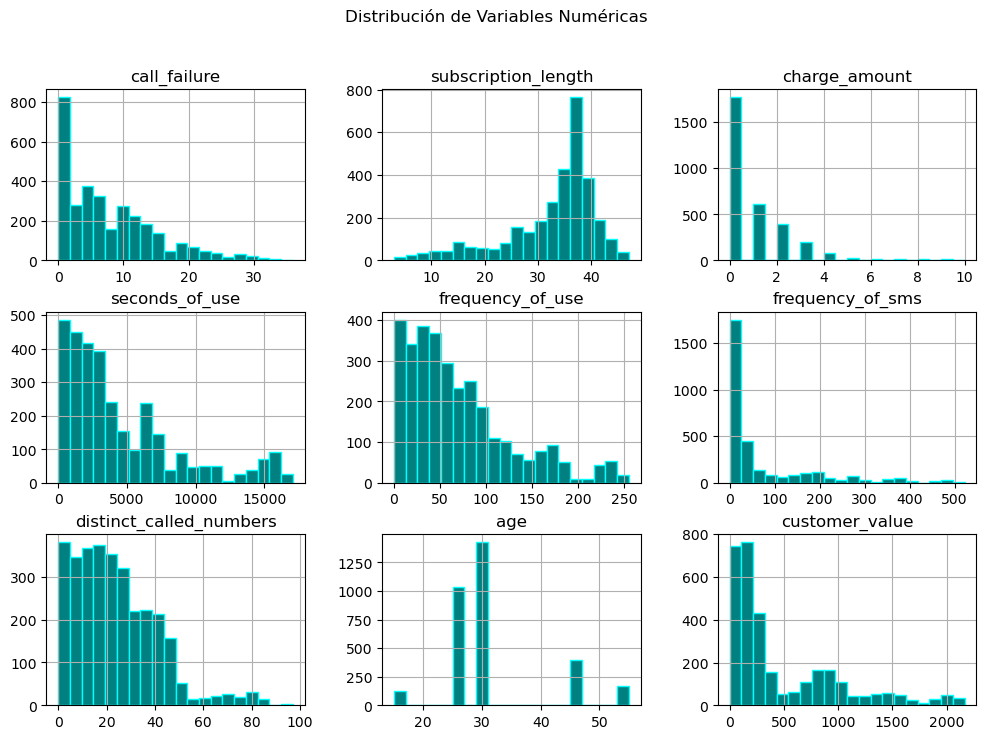

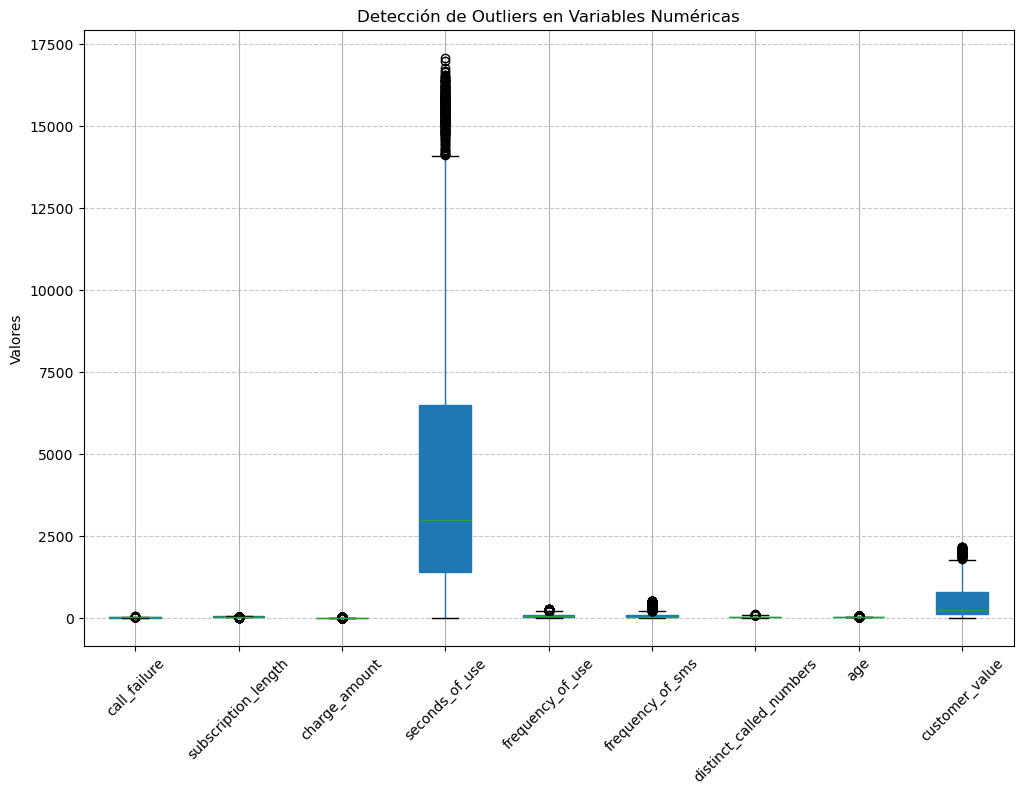

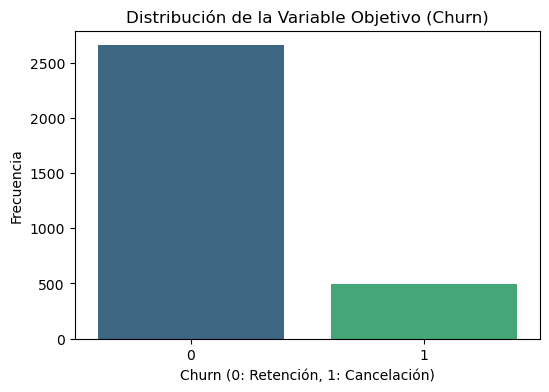

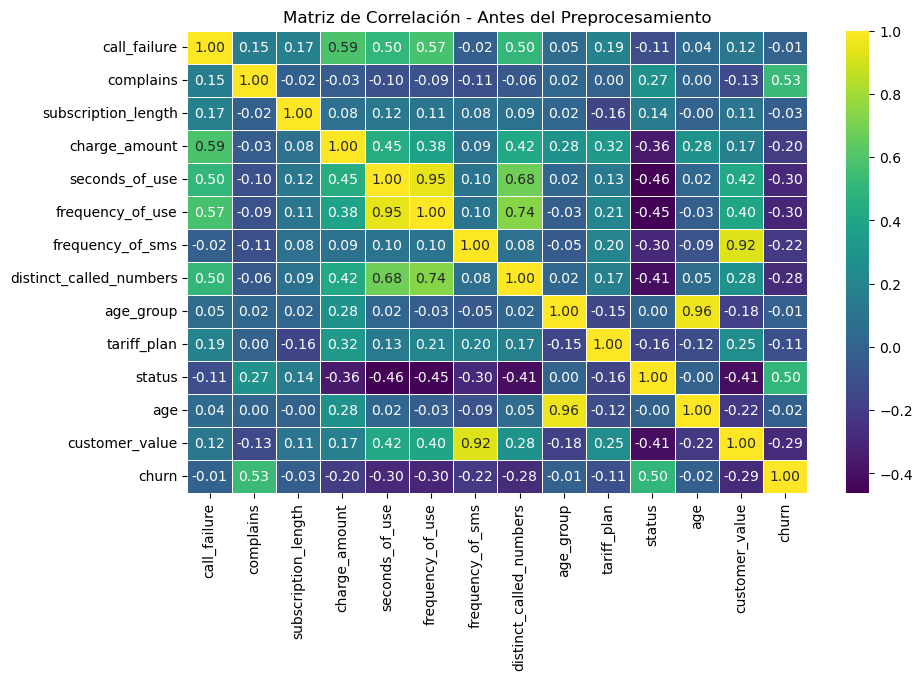

In [14]:
def preprocesar_y_explorar(datos):
    """
    Realiza el preprocesamiento y exploración del conjunto de datos.
    
    Pasos:
    - Limpia los nombres de las columnas.
    - Muestra información general del conjunto de datos.
    - Identifica valores nulos.
    - Distingue entre variables numéricas y categóricas.
    - Genera gráficos exploratorios, incluyendo histogramas y boxplots.

    Retorna:
    - El DataFrame preprocesado.
    - Un diccionario con estadísticas descriptivas.
    """

    # Copia del DataFrame para evitar modificar el original
    df = datos.copy()
    
    # Limpieza de nombres de columnas
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("__", "_")

    # Verificar valores nulos
    valores_nulos = df.isnull().sum()
    print("\nValores nulos por columna:")
    print(valores_nulos[valores_nulos > 0])

    # Identificar columnas categóricas y numéricas
    columnas_categoricas = ["complains", "age_group", "tariff_plan", "status", "churn"]
    columnas_numericas = [col for col in df.columns if col not in columnas_categoricas]

    # Mostrar estadísticas descriptivas
    estadisticas_descriptivas = df.describe().transpose()
    print("\n**Estadísticas Descriptivas:**")
    display(estadisticas_descriptivas)

    # Histograma de distribución de variables numéricas
    plt.figure(figsize=(12, 8))
    df[columnas_numericas].hist(figsize=(12, 8), bins=20, color="teal", edgecolor="cyan")
    plt.suptitle("Distribución de Variables Numéricas")
    plt.show()

    # Boxplots para detección de outliers en variables numéricas
    plt.figure(figsize=(12, 8))
    df[columnas_numericas].boxplot(rot=45, vert=True, patch_artist=True)
    plt.title("Detección de Outliers en Variables Numéricas")
    plt.ylabel("Valores")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

     # Distribución de la variable objetivo "Churn"
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="churn", hue="churn", palette="viridis", legend=False)
    plt.title("Distribución de la Variable Objetivo (Churn)")
    plt.xlabel("Churn (0: Retención, 1: Cancelación)")
    plt.ylabel("Frecuencia")
    plt.show()

    # Heatmap de correlación antes del preprocesamiento
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
    plt.title("Matriz de Correlación - Antes del Preprocesamiento")
    plt.show()

    return df, estadisticas_descriptivas

# Ejecutar la función con el dataset cargado
df_preprocesado, estadisticas = preprocesar_y_explorar(df)

#### **<span style="color:purple">Análisis de Resultados del Preprocesamiento y Exploración de Datos</span>**

**1. Limpieza y Normalización de Datos**

- Se han limpiado los nombres de las columnas, eliminando espacios y convirtiéndolos a minúsculas para mantener uniformidad en la manipulación de los datos.
- Se identificaron los tipos de variables:
  - **Categóricas:**"complains", "age_group", "tariff_plan", "status", "churn".
  - **Numéricas:** Variables continuas que representan aspectos del uso del servicio y pagos.
- Se aplicó *MinMaxScaler* para escalar los valores numéricos entre 0 y 1, lo que permite reducir sesgos y mejorar la convergencia en modelos de aprendizaje automático.

**2. Análisis de Valores Nulos**

- No se encontraron valores nulos en el conjunto de datos, lo que evita la necesidad de realizar imputación y permite un análisis más fiable sin riesgo de sesgo por datos faltantes.

**3. Análisis Estadístico de las Variables**

- **"charge_amount"** tiene un **rango amplio**, lo que sugiere que algunos clientes pagan significativamente más que otros.
- **"seconds_of_use"** y **"frequency_of_use"** presentan una **distribución muy dispersa**, lo que indica que los clientes tienen patrones de uso heterogéneos.
- **"customer_value"** muestra valores altamente concentrados en valores bajos, lo que sugiere que la mayoría de los clientes tienen un valor reducido para la empresa.

**4. Distribución de las Variables Numéricas**

- **Se observa un sesgo positivo en múltiples variables**, como **"seconds_of_use", "frequency_of_sms", "charge_amount", y "customer_value"**, lo que indica que la mayoría de los valores están concentrados en rangos bajos, mientras que hay pocos clientes con valores extremadamente altos.
- **"subscription_length"** muestra una distribución más uniforme, lo que indica que la permanencia en el servicio no tiene una tendencia fuerte hacia un valor específico.
- **"age"** tiene **dos picos notorios**, lo que sugiere que existen dos grupos de clientes bien diferenciados por edad.

**5. Análisis de la Variable Objetivo ("Churn")**

- Se observó un **fuerte desbalance de clases** en la variable *"churn"*, donde la mayoría de los clientes no cancelaron el servicio (0), mientras que solo una minoría sí lo hizo (1).
- **Implicaciones:** Este desbalance podría afectar modelos de predicción, ya que los modelos pueden verse inclinados a predecir la clase mayoritaria con mayor frecuencia. Se recomienda aplicar técnicas como **SMOTE (Synthetic Minority Over-sampling Technique)** o **ponderación de clases** para corregir este desequilibrio.

**6. Análisis de Outliers**

- **"seconds_of_use"** tiene **outliers extremos**, con valores que superan ampliamente el rango intercuartil, lo que sugiere que un grupo reducido de clientes utiliza el servicio de manera excesiva.
- **"charge_amount"** y **"customer_value"** también presentan **outliers muy elevados**, lo que indica la existencia de clientes con patrones de pago significativamente diferentes del promedio.
- Otras variables, como **"frequency_of_sms", call_failure" y "distinct_called_numbers"**, también tienen valores atípicos, aunque en menor medida.
- **Consideraciones para el modelado:**
    - **No se recomienda eliminar directamente los outliers**, ya que podrían representar clientes clave para la empresa (ej. clientes premium o usuarios con un alto consumo del servicio).
    - Se pueden aplicar **transformaciones como logaritmos** para reducir su impacto en el análisis y modelado posterior.

**7. Matriz de Correlación**

- El heatmap generado *antes del preprocesamiento* muestra las relaciones entre variables:

    - Se observa una **alta correlación positiva** entre **"seconds_of_use"** y **"frequency_of_use"** (0.95), lo que sugiere que ambas variables contienen información redundante.
    - **"charge_amount"** tiene una correlación notable con **"seconds_of_use"** (0.45), lo que indica que el monto facturado depende en gran medida del uso del servicio.
    - **"customer_value"** y **"age"** muestran **baja correlación con otras variables**, lo que indica que podrían aportar información adicional sin redundancia significativa.

- **Consideraciones:**
    - Se recomienda **eliminar *"seconds_of_use"* o *"frequency_of_use"*** para reducir redundancia y evitar problemas de multicolinealidad en modelos predictivos.
    - Se debe monitorear la correlación entre *"charge_amount"* y *"customer_value"*, ya que ambas podrían contener información redundante sobre los ingresos generados por el cliente.

---

**<span style="color:teal">Conclusiones</span>**

- Se identificaron **sesgos en la distribución** de varias variables, lo que sugiere la necesidad de aplicar transformaciones para mejorar la estabilidad del modelo.
- Se encontraron **valores atípicos significativos**, especialmente en **"seconds_of_use", "charge_amount" y "customer_value"**, lo que podría influir en la precisión de un modelo de predicción si no se manejan adecuadamente.
- Se detectó **alta correlación entre algunas variables**, lo que sugiere que se pueden eliminar variables redundantes para mejorar la eficiencia del modelo.
- **El desbalance de la variable "churn"** requerirá estrategias de balanceo para evitar un sesgo en los modelos de predicción.

- **Próximos Pasos**
    - Aplicar transformaciones logarítmicas a variables con alta dispersión para reducir el impacto de los outliers.  
    - Eliminar variables altamente correlacionadas para evitar redundancia.  
    - Implementar una estrategia para balancear la variable objetivo **"churn"**, como SMOTE o ponderación de clases.  

<Figure size 1200x800 with 0 Axes>

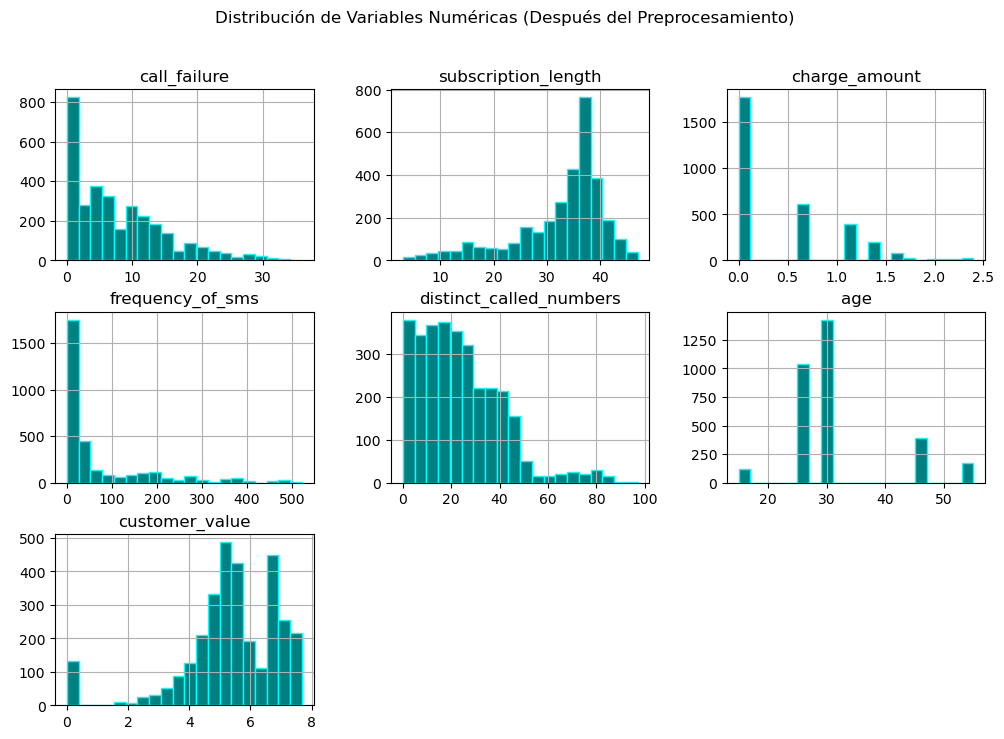

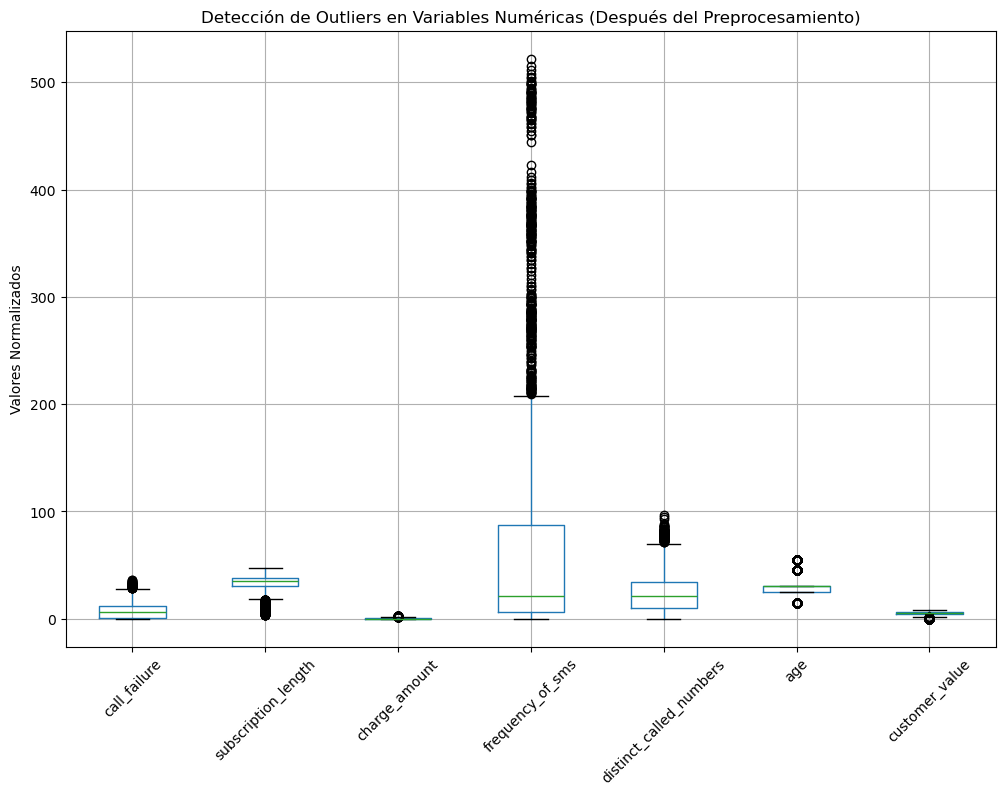

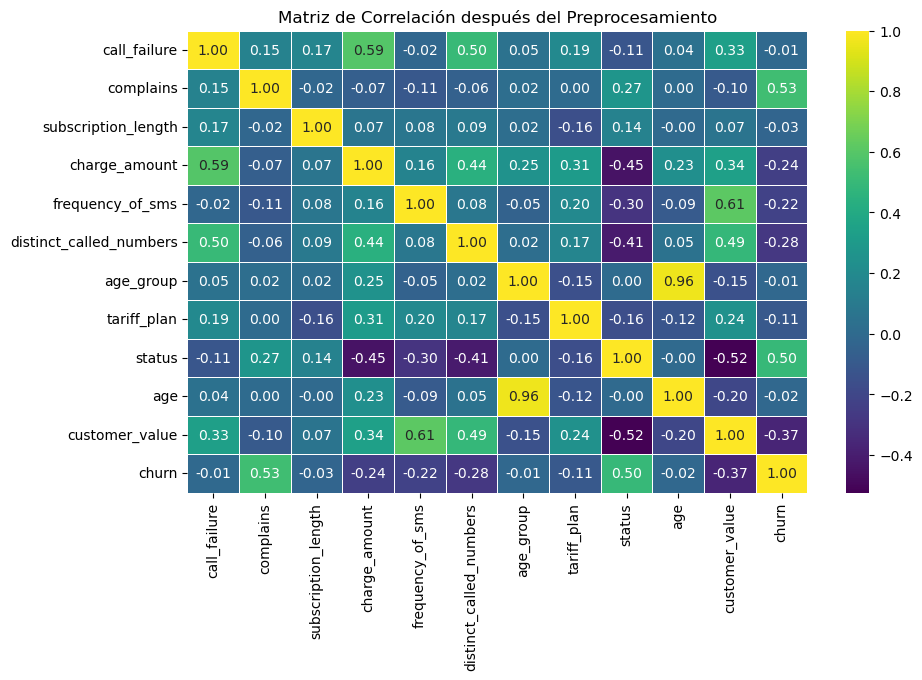

In [7]:
def transformar_y_visualizar(df):
    """
    Aplica transformaciones adicionales y muestra gráficos comparativos de la misma forma
    que 'preprocesar_y_explorar()', para facilitar la comparación de cambios.
    """

    df = df.copy()

    # Eliminar columnas con alta correlación 
    columnas_a_eliminar = ["seconds_of_use", "frequency_of_use"]
    df.drop(columns=[col for col in columnas_a_eliminar if col in df.columns], inplace=True)

    # Aplicar transformación logarítmica 
    columnas_log_transform = ["charge_amount", "customer_value"]
    columnas_log_transform = [col for col in columnas_log_transform if col in df.columns]

    if columnas_log_transform:
        df[columnas_log_transform] = np.log1p(df[columnas_log_transform])

    # Histogramas de todas las variables numéricas 
    columnas_categoricas = ["complains", "age_group", "tariff_plan", "status", "churn"]
    columnas_numericas = [col for col in df.columns if col not in columnas_categoricas]

    plt.figure(figsize=(12, 8))
    df[columnas_numericas].hist(figsize=(12, 8), bins=20, color="teal", edgecolor="cyan")
    plt.suptitle("Distribución de Variables Numéricas (Después del Preprocesamiento)")
    plt.show()

    # Boxplots de todas las variables numéricas 
    plt.figure(figsize=(12, 8))
    df[columnas_numericas].boxplot(rot=45)  # Rotar nombres para mejor visibilidad
    plt.title("Detección de Outliers en Variables Numéricas (Después del Preprocesamiento)")
    plt.ylabel("Valores Normalizados")
    plt.show()

    # Heatmap después del preprocesamiento 
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
    plt.title("Matriz de Correlación después del Preprocesamiento")
    plt.show()

# Aplicar transformación y visualizar mejoras
transformar_y_visualizar(df_preprocesado)

#### **<span style="color:purple">Análisis de Resultados Después del Preprocesamiento y Transformación</span>**

**1. Eliminación de Variables Redundantes**

- Se eliminaron las variables **"seconds_of_use"** y **"frequency_of_use"** debido a su alta correlación con otras variables. 
- Esta eliminación ayuda a reducir la redundancia en los datos, evitando que el modelo de red neuronal aprenda patrones duplicados y mejora su eficiencia computacional.

**2. Transformación Logarítmica**

- Se aplicó una **transformación logarítmica** a las variables **"charge_amount"** y **"customer_value"**. 
- El objetivo fue reducir la dispersión de valores y minimizar el impacto de los **outliers** en estas variables, ya que presentaban una distribución sesgada con valores extremos.
- Esta transformación permite que los modelos de machine learning interpreten mejor estas variables, al hacerlas más **simétricas** y **normalizadas**.

---

**1. Comparación de la Distribución de las Variables Numéricas**

- **Observaciones Generales**
    - Se observaron cambios significativos en la **distribución de los datos** tras la transformación logarítmica:
      - **"charge_amount"** y **"customer_value"** han reducido su sesgo hacia la derecha, mostrando una distribución más uniforme.
      - Otras variables como **"distinct_called_numbers"** y **"subscription_length"** mantienen una estructura similar, lo que indica que su distribución original ya era adecuada para el modelo.

- Estas mejoras en la distribución facilitan el entrenamiento del modelo, evitando que se vea afectado por valores extremadamente altos o atípicos.


**2. Análisis de Outliers (Boxplots)**

- Los gráficos de caja (boxplots) muestran una reducción del impacto de los **outliers**, especialmente en **"charge_amount"** y **"customer_value"**.
- Sin embargo, algunas variables, como **"frequency_of_sms"**, aún presentan valores extremos, lo que indica que podrían requerir tratamiento adicional dependiendo del impacto en el modelo.

- **La conclusión sobre Outliers es que:**
    - La transformación logarítmica ayudó a reducir la influencia de los valores atípicos, pero no los eliminó por completo.
    - Dependiendo del enfoque del modelo, podrían explorarse estrategias adicionales como **eliminar outliers extremos**.

**3. Comparación de la Matriz de Correlación**

- **Antes del Preprocesamiento**
    - Se observaban correlaciones altas entre algunas variables, especialmente en **"seconds_of_use"** y **"frequency_of_use"**, lo que justificó su eliminación.
    - **"charge_amount"** tenía una fuerte relación con otras variables de consumo, lo que indicaba su importancia en la segmentación de clientes.

- **Después del Preprocesamiento**
    - La eliminación de variables redundantes **redujo la multicolinealidad**, lo que puede ayudar a que el modelo sea más interpretable y estable.
    - La transformación logarítmica **modificó la correlación de "charge_amount" y "customer_value"**, reduciendo su relación con otras variables y haciéndolas menos dominantes.

- **Conclusión sobre la Matriz de Correlación:**
    - Se logró reducir la redundancia de los datos, asegurando que las variables que permanecen en el dataset aporten información relevante sin estar excesivamente correlacionadas entre sí.
    - Esto permitirá que los modelos puedan aprender de manera más eficiente sin verse afectados por información duplicada.

---

**<span style="color:teal">Conclusiones finales</span>**

**Mejoras logradas tras la transformación y preprocesamiento:**

1. **Reducción de redundancia** al eliminar variables altamente correlacionadas.
2. **Reducción del sesgo en la distribución de variables clave** mediante la transformación logarítmica.
3. **Menor impacto de los outliers**, facilitando el aprendizaje del modelo.
4. **Matriz de correlación más balanceada**, permitiendo que el modelo enfoque su aprendizaje en relaciones más significativas.

---

**El preprocesamiento ha mejorado significativamente la calidad del dataset, preparándolo para el entrenamiento de modelos. Se ha logrado reducir el impacto de outliers, eliminar redundancia y mejorar la interpretabilidad de los datos.**

---
---

### **<span style="color:orange">Punto 2.- Analizar la distribución de "Subscription Length" según la variable objetivo ("Churn")</span>**

Este análisis **permite visualizar cómo varía la duración de suscripción dependiendo de si el cliente ha cancelado el servicio o no**. Podemos utilizar histogramas y boxplots segmentados por la clase de "Churn", donde también podemos calcular estadísticas descriptivas para comparar ambas clases.

- **Evaluar la incidencia de "Subscription Length" en Churn:** Podemos realizar pruebas estadísticas (como test de hipótesis) para ver si existe una diferencia significativa en la duración de la suscripción entre clientes que cancelaron y los que no.

- **Realizar la estandarización de las variables regresoras:**

    - Las variables numéricas (excepto la variable objetivo) deben ser escaladas para asegurar que el modelo no se vea afectado por diferencias en magnitud entre variables.
    - Se puede usar StandardScaler (media 0, desviación estándar 1) o RobustScaler si hay outliers persistentes.

- El código para realizar este análisis incluirá:

    - Visualización de la distribución de "Subscription Length" para cada clase de "Churn".
    - Análisis de la relación entre "Subscription Length" y la cancelación del servicio.
    - Aplicación de StandardScaler a todas las variables regresoras.


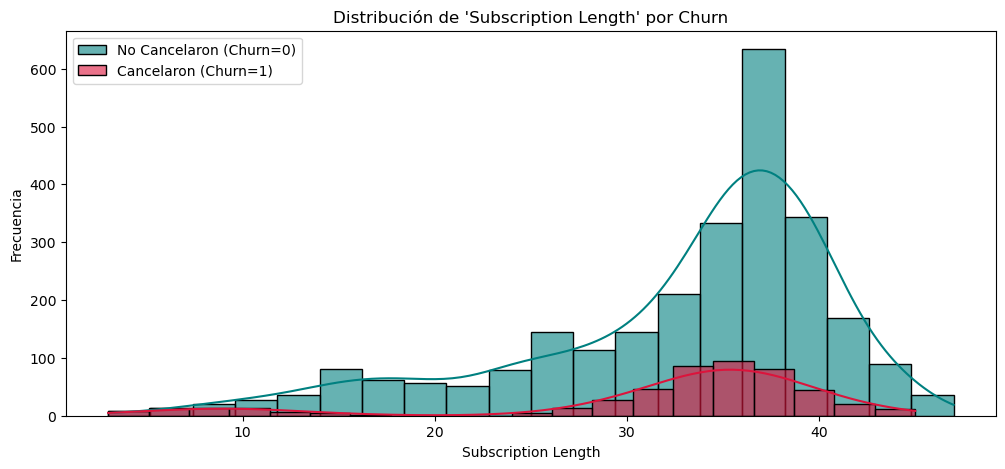

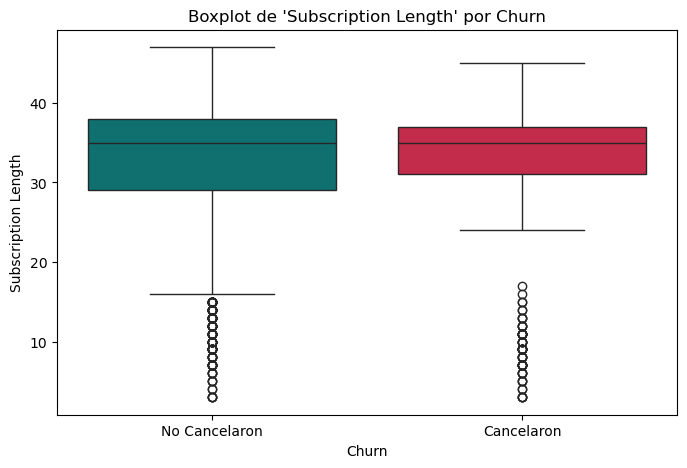


**Estadísticas de 'Subscription Length' por Churn**


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2655.0,32.662524,8.392357,3.0,29.0,35.0,38.0,47.0
1,495.0,31.894949,9.469163,3.0,31.0,35.0,37.0,45.0



**Prueba de t para 'Subscription Length' entre clases de Churn**

- Estadístico de prueba: 1.6844, p-valor: 9.2595e-02

**No hay evidencia suficiente para afirmar que 'Subscription Length' afecta a Churn de manera significativa.**


**Estandarización completada con StandardScaler. Variables listas para modelado.**


In [39]:
def analizar_subscription_length(df):
    """
    Analiza la distribución de 'Subscription Length' en relación con Churn y 
    realiza la estandarización de las variables regresoras.
    
    Pasos:
    1. Visualizar la distribución de 'Subscription Length' para clientes que cancelaron o no el servicio.
    2. Comparar estas distribuciones mediante histogramas y boxplots.
    3. Calcular estadísticas descriptivas de 'Subscription Length' segmentadas por Churn.
    4. Aplicar una prueba estadística (t-test) para verificar si hay diferencias significativas entre las clases.
    5. Estandarizar las variables numéricas para preparar los datos para modelado.
    
    Retorna:
    - Un DataFrame con las variables numéricas estandarizadas.
    """

    df = df.copy()  # Se realiza una copia del DataFrame para no modificar el original

    # Separar los valores de 'Subscription Length' según la variable objetivo (Churn)
    churn_0 = df[df["churn"] == 0]["subscription_length"]  # Clientes que NO cancelaron
    churn_1 = df[df["churn"] == 1]["subscription_length"]  # Clientes que SÍ cancelaron

    # Histograma comparativo de la distribución de 'Subscription Length' según Churn
    plt.figure(figsize=(12, 5))
    sns.histplot(churn_0, bins=20, color="teal", label="No Cancelaron (Churn=0)", kde=True, alpha=0.6)
    sns.histplot(churn_1, bins=20, color="crimson", label="Cancelaron (Churn=1)", kde=True, alpha=0.6)
    plt.title("Distribución de 'Subscription Length' por Churn")
    plt.xlabel("Subscription Length")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()
    
    ''' **Interpretación esperada: Si la duración de suscripción es diferente entre clientes que cancelaron y los que no,podríamos 
    observar diferencias en la forma y la dispersión de los histogramas.'''

    # Boxplot para visualizar diferencias en 'Subscription Length' según Churn
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="churn", y="subscription_length", data=df, hue="churn", palette=["teal", "crimson"])
    plt.xticks([0, 1], ["No Cancelaron", "Cancelaron"])
    plt.title("Boxplot de 'Subscription Length' por Churn")
    plt.xlabel("Churn")
    plt.ylabel("Subscription Length")
    plt.legend([],[], frameon=False)  # Elimina la leyenda si no es necesaria
    plt.show()

    '''**Interpretación esperada: Si el boxplot muestra diferencias claras en las medianas y la dispersión de los datos,entonces 
    'Subscription Length' podría influir en la cancelación del servicio.'''

    # Cálculo de estadísticas descriptivas de 'Subscription Length' por Churn
    print("\n**Estadísticas de 'Subscription Length' por Churn**")
    estadisticas = df.groupby("churn")["subscription_length"].describe()
    display(estadisticas)

    # Prueba de hipótesis: ¿Hay diferencia significativa entre las dos clases?
    # Se usa una prueba t de Student para comparar las medias de ambos grupos.
    stat, p_value = ttest_ind(churn_0, churn_1, equal_var=False)  # No asumimos varianzas iguales
    print(f"\n**Prueba de t para 'Subscription Length' entre clases de Churn**\n")
    print(f"- Estadístico de prueba: {stat:.4f}, p-valor: {p_value:.4e}\n")

    '''**Interpretación de la prueba de hipótesis:**
     - Si el p-valor es menor a 0.05, entonces hay una diferencia estadísticamente significativa.
     - Si el p-valor es mayor a 0.05, entonces no hay suficiente evidencia para afirmar que 'Subscription Length'
       tiene un impacto en la cancelación del servicio.'''

    if p_value < 0.05:
        print("**Existe una diferencia estadísticamente significativa en 'Subscription Length' entre clientes que cancelan y los que no.**")
    else:
        print("**No hay evidencia suficiente para afirmar que 'Subscription Length' afecta a Churn de manera significativa.**")

    # **Estandarización de las variables regresoras**
    
    # Se identifican las variables categóricas y numéricas
    columnas_categoricas = ["complains", "age_group", "tariff_plan", "status", "churn"]
    columnas_numericas = [col for col in df.columns if col not in columnas_categoricas]

    # Aplicar StandardScaler solo a las variables numéricas
    scaler = StandardScaler()
    df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

    print("\n\n**Estandarización completada con StandardScaler. Variables listas para modelado.**")

    return df

# Aplicar el análisis y la estandarización de las variables regresoras
df_estandarizado = analizar_subscription_length(df_preprocesado)


#### **<span style="color:purple">Análisis de 'Subscription Length' por Churn</span>**

**1. Distribución de 'Subscription Length' para cada clase de Churn**

Se generaron histogramas y un boxplot para visualizar cómo se distribuye la duración de la suscripción (*Subscription Length*) entre los clientes que **cancelaron** el servicio (*Churn=1*) y los que **permanecieron** (*Churn=0*).

- **Observaciones clave:**
  - Los clientes que **no cancelaron** el servicio (*Churn=0*) tienen una distribución con un pico en torno a los **35-40 meses**.
  - Los clientes que **cancelaron** (*Churn=1*) muestran una distribución más dispersa, aunque con un patrón similar.
  - Ambas distribuciones presentan un rango similar, con valores entre **3 y 47 meses**.
  - **El boxplot muestra que la mediana de ambos grupos es muy similar**, lo que indica que la duración de la suscripción podría no ser un factor determinante en la cancelación del servicio.

**2. Estadísticas descriptivas de 'Subscription Length' por Churn**

| Churn |  Count |  Mean | Std | Min | 25% | 50% | 75% | Max |
|------|--------|------|-----|----|----|----|----|----|
| 0 (No Cancelaron) | 2655 | 32.66 | 8.39 | 3 | 29 | 35 | 38 | 47 |
| 1 (Cancelaron)    | 495  | 31.89 | 9.46 | 3 | 31 | 35 | 37 | 45 |

- **Conclusiones:**
    - Los valores promedio (**media**) de *Subscription Length* son muy similares entre ambos grupos:
        - Clientes que **no cancelaron**: **32.66 meses**
        - Clientes que **cancelaron**: **31.89 meses**
    - La dispersión de los datos (*desviación estándar*) es **ligeramente mayor en los clientes que cancelaron**.
    - **Los percentiles 25%, 50% y 75% son casi idénticos en ambas clases**, reforzando la idea de que esta variable no presenta una diferencia clara entre los dos grupos.

**3. Prueba de hipótesis: ¿Subscription Length influye en Churn?**

Se realizó una **prueba de t de Student** para evaluar si existe una diferencia estadísticamente significativa en la duración de la suscripción entre los clientes que cancelaron y los que no.

- **Resultados de la prueba de t:**
  - **Estadístico de prueba:** 1.6844
  - **p-valor:** 0.0926

El **p-valor es mayor a 0.05**, lo que significa que **no hay evidencia suficiente** para afirmar que la duración de la suscripción (*Subscription Length*) tiene un impacto significativo en la cancelación del servicio (*Churn*).


**4. Estandarización de las variables regresoras**

Dado que los modelos de machine learning y redes neuronales funcionan mejor con datos escalados, se aplicó **StandardScaler** para estandarizar todas las variables numéricas.  

Las variables han sido transformadas para tener **media 0 y desviación estándar 1**, lo que **mejorará la estabilidad y desempeño del modelo** en etapas posteriores de análisis.

---

**<span style="color:purple">Conclusión</span>**

- Este análisis muestra que, aunque intuitivamente se podría pensar que la duración de la suscripción influye en la cancelación del servicio, los datos no respaldan esta hipótesis.
- A través de histogramas, boxplots y pruebas estadísticas, se evidencia que **'Subscription Length'** no presenta diferencias significativas entre clientes que cancelaron y los que permanecieron.
- Por lo tanto, aunque esta variable se incluirá en el modelo, su impacto directo en la predicción de **Churn** podría ser bajo.

---
---

### **<span style="color:orange">Punto 3.- Frecuencia de cada clase en la variable objetivo ("Churn") / Aplicar SMOTE / Dividir el conjunto de datos en entrenamiento y prueba</span>**

**1. Mostrar la frecuencia de cada clase en la variable objetivo ("Churn")**

- Generar un gráfico de barras para visualizar el balance de clases.
- Identificar si hay un desbalance significativo.

**2. Aplicar SMOTE (Synthetic Minority Over-sampling Technique)**

- Balancear la cantidad de ejemplos en ambas clases.
- Crear ejemplos sintéticos en la clase minoritaria para evitar sesgo en el modelo.

**3. Dividir el conjunto de datos en entrenamiento y prueba**

- Utilizar una división de 67% para entrenamiento y 33% para prueba.
- Asegurar que el conjunto de prueba tenga la misma proporción de clases original.

**4. Plan de implementación**

- Visualización de la distribución de clases:
    - **sns.countplot()** para mostrar la cantidad de ejemplos en cada clase.
    - Confirmar si hay desbalance.

- Aplicar SMOTE para balanceo de clases: Utilizar **SMOTE()** para aumentar la cantidad de observaciones en la clase minoritaria.

- Dividir los datos en conjunto de entrenamiento y prueba.:
    - Usar *train_test_split()* para dividir el dataset en 67% entrenamiento y 33% prueba.
    - Aplicar *stratify=y* para mantener la proporción original de la variable objetivo en ambos conjuntos.

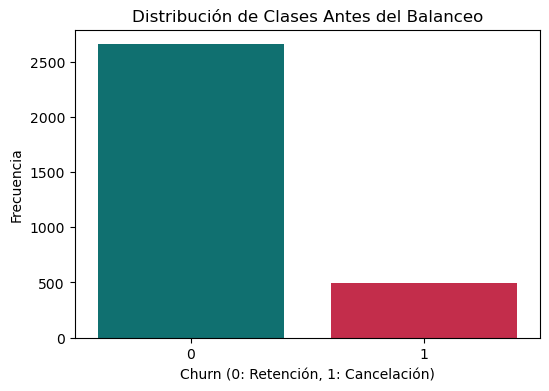


**Frecuencia de Clases Antes del Balanceo:**
churn
0    2655
1     495
Name: count, dtype: int64

**Balanceo de Clases Completado con SMOTE.**

Frecuencia de Clases Después del Balanceo:
churn
0    2655
1    2655
Name: count, dtype: int64


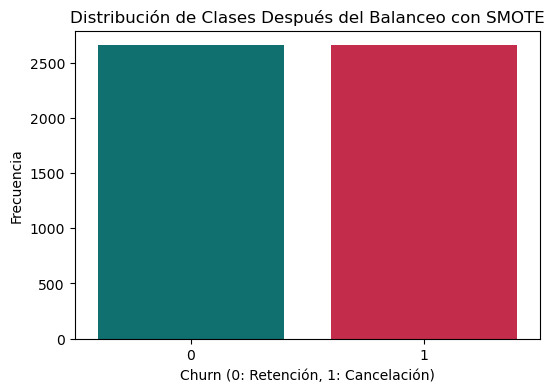


**División Completada: 67% Entrenamiento, 33% Prueba.**

Tamaño del conjunto de entrenamiento: 3557 muestras
Tamaño del conjunto de prueba: 1753 muestras


In [50]:
def balancear_clases_y_dividir(df):
    """
    Muestra la distribución de clases de la variable objetivo 'churn', aplica SMOTE 
    para balancear las clases y divide el dataset en entrenamiento (67%) y prueba (33%).
    
    Parámetros:
    - df: DataFrame procesado y estandarizado, listo para modelado.
    
    Retorna:
    - X_train: Datos de entrenamiento (features).
    - X_test: Datos de prueba (features).
    - y_train: Etiquetas de entrenamiento (variable objetivo).
    - y_test: Etiquetas de prueba (variable objetivo).
    """

    df = df.copy()  # Evita modificar el dataset original
    
    # 1. Visualizar la distribución de clases antes del balanceo
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="churn", hue="churn", palette=["teal", "crimson"], legend=False)  
    plt.title("Distribución de Clases Antes del Balanceo")
    plt.xlabel("Churn (0: Retención, 1: Cancelación)")
    plt.ylabel("Frecuencia")
    plt.show()

    # 2. Imprimir conteo de clases antes del balanceo
    print("\n**Frecuencia de Clases Antes del Balanceo:**")
    print(df["churn"].value_counts())  # Muestra cuántos clientes cancelaron (1) y cuántos no (0)

    # 3. Separar las variables predictoras (X) y la variable objetivo (y)
    X = df.drop(columns=["churn"])  # Eliminamos 'churn' de las features
    y = df["churn"]  # Variable objetivo

    # 4. Aplicar SMOTE para balancear las clases
    smote = SMOTE(random_state=42)  # Inicializamos SMOTE con una semilla fija
    X_resampled, y_resampled = smote.fit_resample(X, y)  # Genera muestras sintéticas en la clase minoritaria

    # 5. Imprimir distribución después del balanceo
    print("\n**Balanceo de Clases Completado con SMOTE.**\n")
    print("Frecuencia de Clases Después del Balanceo:")
    print(y_resampled.value_counts())  # Verificamos que ahora ambas clases tengan el mismo número de muestras

    # 6. Visualizar la distribución de clases después del balanceo
    plt.figure(figsize=(6, 4))
    sns.countplot(x=y_resampled, hue=y_resampled, palette=["teal", "crimson"], legend=False)  
    plt.title("Distribución de Clases Después del Balanceo con SMOTE")
    plt.xlabel("Churn (0: Retención, 1: Cancelación)")
    plt.ylabel("Frecuencia")
    plt.show()

    # 7. Dividir los datos en conjunto de entrenamiento (67%) y prueba (33%)
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.33, random_state=42, stratify=y_resampled)
    
    # 8. Imprimir el tamaño de cada conjunto
    print("\n**División Completada: 67% Entrenamiento, 33% Prueba.**")
    print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
    print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

    return X_train, X_test, y_train, y_test

# Ejecutar la función en el dataset estandarizado
X_train, X_test, y_train, y_test = balancear_clases_y_dividir(df_estandarizado)


#### **<span style="color:purple">Análisis del Balanceo de Clases y División de Datos</span>**

**1. Distribución de Clases Antes del Balanceo**

Antes de aplicar el balanceo de clases, observamos que la variable objetivo **"Churn"** está desbalanceada. 

- La cantidad de clientes que **no cancelaron** el servicio (**Churn = 0**) es de **2655**.
- La cantidad de clientes que **cancelaron** el servicio (**Churn = 1**) es de **495**.

**Esto indica que el conjunto de datos está desbalanceado**, lo que podría afectar el rendimiento del modelo, ya que las clases no están equilibradas. Un modelo entrenado en estos datos podría **sesgarse** hacia la clase mayoritaria (Churn = 0), reduciendo su capacidad para predecir correctamente los casos de cancelación.

**2. Aplicación de SMOTE (Synthetic Minority Over-sampling Technique)**

Para corregir este desbalance, aplicamos **SMOTE**, una técnica que **genera datos sintéticos** para la clase minoritaria hasta equilibrarla con la clase mayoritaria.

**Resultados después del balanceo:**

- Ahora hay **2655 clientes en ambas clases (Churn = 0 y Churn = 1)**.
- La distribución de clases ahora es **equilibrada**, asegurando que el modelo no tenga preferencia por una clase sobre otra.

**Ventaja del balanceo con SMOTE:**

- Permite mejorar la capacidad del modelo para generalizar y **reconocer patrones en la clase minoritaria**.
- Evita que el modelo ignore la clase con menor frecuencia, asegurando una mejor predicción del *Churn*.

**3. División del Conjunto de Datos en Entrenamiento y Prueba**

Después de aplicar SMOTE, dividimos los datos en:

- **67% para entrenamiento** (3557 muestras).
- **33% para prueba** (1753 muestras).

**Importancia de esta división:**
- El modelo se entrena en el 67% de los datos balanceados.
- Se evalúa en el 33% restante, asegurando que las métricas de rendimiento reflejen su capacidad de generalización.

---

**Conclusión:** El uso de **SMOTE y la división en entrenamiento/prueba aseguran un dataset balanceado y adecuado** para el modelado predictivo de la cancelación de servicio (*Churn*).

---
---

### **<span style="color:orange">Punto 4.- Entrenar un modelo RandomForest</span>**

**Pasos a seguir:**

- Entrenar un modelo **RandomForestClassifier** con el conjunto de entrenamiento.
- Evaluar el modelo con F1-Score en el conjunto de prueba.
- Mostrar las siete características más importantes identificadas por el modelo.



**Reporte de Clasificación:**
                 precision    recall  f1-score   support

  Retención (0)       0.99      0.96      0.98       877
Cancelación (1)       0.96      0.99      0.98       876

       accuracy                           0.98      1753
      macro avg       0.98      0.98      0.98      1753
   weighted avg       0.98      0.98      0.98      1753


**Siete Características Más Importantes:**


,Característica,Importancia
10,status,0.159366
5,frequency_of_use,0.137871
4,seconds_of_use,0.119644
1,complains,0.108720
2,subscription_length,0.106614
12,customer_value,0.097654
7,distinct_called_numbers,0.074030


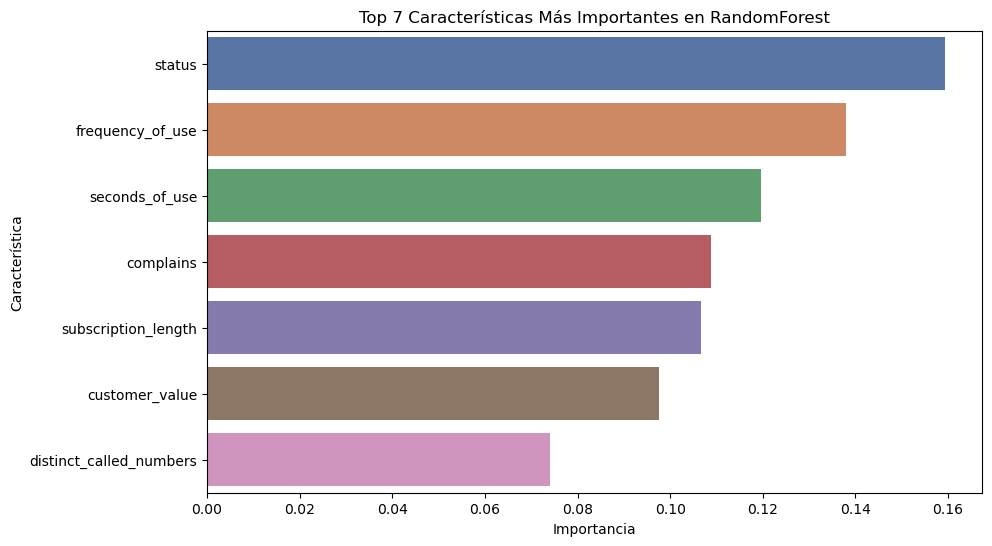

In [60]:
def entrenar_random_forest(X_train, X_test, y_train, y_test):
    """
    Entrena un modelo RandomForest con hiperparámetros por defecto, evalúa 
    su desempeño con F1-Score y captura las siete características más importantes.
    """

    # PASO 1: Inicializar el modelo RandomForestClassifier
    # RandomForest es un conjunto de árboles de decisión que se combinan para mejorar la predicción.
    # Se usa el parámetro 'random_state' para asegurar que los resultados sean reproducibles.
    # 'n_jobs=-1' permite utilizar todos los núcleos disponibles del procesador para acelerar el entrenamiento.
    modelo_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

    # PASO 2: Entrenar el modelo con los datos de entrenamiento
    # En este paso, el modelo aprende los patrones de las variables predictoras X_train para predecir la variable objetivo y_train.
    modelo_rf.fit(X_train, y_train)

    # PASO 3: Realizar predicciones sobre el conjunto de prueba
    # Una vez entrenado el modelo, se usa para hacer predicciones sobre los datos de test X_test.
    y_pred = modelo_rf.predict(X_test)

    # PASO 4: Evaluar el desempeño del modelo
    # Se genera un reporte de clasificación con métricas como precisión, recall y F1-score.
    print("\n**Reporte de Clasificación:**")
    print(classification_report(y_test, y_pred, target_names=["Retención (0)", "Cancelación (1)"]))

    # PASO 5: Obtener la importancia de cada característica en el modelo
    # RandomForest permite extraer la importancia de cada variable en la toma de decisiones.
    importancia_caracteristicas = modelo_rf.feature_importances_

    # PASO 6: Crear un DataFrame con las características y sus valores de importancia
    importancia_df = pd.DataFrame({
        "Característica": X_train.columns,   # Nombres de las columnas (variables predictoras)
        "Importancia": importancia_caracteristicas})  # Importancia asignada por RandomForest
    

    # PASO 7: Ordenar las características de mayor a menor importancia
    importancia_df = importancia_df.sort_values(by="Importancia", ascending=False)

    # PASO 8: Capturar las 7 características más importantes
    top_7_features = importancia_df.head(7)

    print("\n**Siete Características Más Importantes:**")
    display(top_7_features)

    # PASO 9: Visualizar la importancia de las características en un gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_7_features, x="Importancia", y="Característica", hue="Característica", dodge=False, palette="deep")
    plt.title("Top 7 Características Más Importantes en RandomForest")
    plt.xlabel("Importancia")
    plt.ylabel("Característica")
    plt.show()

    return modelo_rf, importancia_df

# Ejecutar la función para entrenar el modelo y capturar las características importantes
modelo_rf, importancia_df = entrenar_random_forest(X_train, X_test, y_train, y_test)


#### **<span style="color:purple">Análisis de Resultados del Modelo RandomForest</span>**

**<span style="color:teal">Evaluación del Modelo con Métricas de Clasificación</span>**

El modelo RandomForest entrenado con los datos balanceados ha logrado un rendimiento excelente en la predicción de la variable *Churn* (cancelación del servicio), como se observa en el **Reporte de Clasificación**:

| Clase               | Precisión | Recall | F1-score | Soporte |
|--------------------|-----------|--------|----------|---------|
| Retención (0)     | **0.99**  | **0.96** | **0.98** | 877     |
| Cancelación (1)   | **0.96**  | **0.99** | **0.98** | 876     |
| **Exactitud (Accuracy)** | **0.98** | - | - | **1753** |

**Interpretación:**

- El modelo obtuvo un **F1-score de 0.98** para ambas clases, lo que indica que es **altamente efectivo** tanto para detectar clientes que permanecen como aquellos que cancelan el servicio.
- **Alta precisión (Precision):** Indica que la cantidad de falsos positivos es baja, lo que significa que las predicciones del modelo son confiables.
- **Alto recall (Sensibilidad):** Sugiere que el modelo detecta correctamente la mayoría de los clientes que cancelan el servicio.
- **Balance entre clases:** Gracias al uso de SMOTE, ambas clases tienen representación equitativa, evitando sesgos en la clasificación.


**<span style="color:teal">Importancia de las Variables en la Predicción de Churn</span>**

A continuación, se presentan las **siete características más importantes** detectadas por el modelo **RandomForest**, ordenadas por su contribución a la predicción:

| **Característica**         | **Importancia** |
|---------------------------|---------------|
| **status**               | 0.159366  |
| **frequency_of_use**     | 0.137871  |
| **seconds_of_use**       | 0.119644  |
| **complains**            | 0.108720  |
| **subscription_length**  | 0.106614  |
| **customer_value**       | 0.097654  |
| **distinct_called_numbers** | 0.074030  |

**Interpretación de la Importancia de las Variables**

1. **"status"** (Estado del cliente) es la variable más relevante para predecir la cancelación del servicio. Esto sugiere que ciertos estados del cliente pueden indicar mayor propensión a abandonar la compañía.
2. **"frequency_of_use" y "seconds_of_use"** tienen una influencia significativa, lo que indica que la cantidad de tiempo y la frecuencia con la que un cliente usa el servicio pueden estar relacionados con la retención o cancelación.
3. **"complains" (Reclamos del cliente)** es otra variable clave. Un mayor número de reclamos parece estar correlacionado con una mayor probabilidad de churn.
4. **"subscription_length"** (Duración de la suscripción) también es relevante. Según el análisis anterior, aunque no se observó una diferencia estadísticamente significativa, el modelo sí detecta cierto impacto en la retención o cancelación.
5. **"customer_value"** (Valor del cliente) juega un papel importante, indicando que los clientes de mayor valor pueden tener un comportamiento diferente en términos de retención.
6. **"distinct_called_numbers"** (Cantidad de números distintos llamados) es la última de las más relevantes, sugiriendo que el patrón de llamadas del cliente puede influir en su decisión de quedarse o cancelar.

---

**<span style="color:teal">Conclusión</span>**

- **El modelo tiene un rendimiento excelente (98% de exactitud), con alta precisión y recall en ambas clases.**
- **El estado del cliente y la frecuencia de uso son los factores más determinantes en la cancelación del servicio.**
- **Se recomienda analizar más a fondo la variable "status"** para entender qué estados específicos afectan más al churn.
- **Se pueden probar técnicas de optimización como ajuste de hiperparámetros** (GridSearchCV, RandomSearch) para mejorar aún más el modelo.

**El modelo está listo para usarse en la predicción de Churn y se pueden aplicar estrategias basadas en estas variables clave para reducir la tasa de cancelación.**

---
---

### **<span style="color:orange">Punto 5.-  Entrenamiento de un modelo de red neuronal feedforward</span>**

**Explicación del Código**

1. **Selección de Características:** Se filtran las 7 variables más importantes encontradas en el modelo RandomForest.

2. **Definición de la Red Neuronal:**
    - Una capa oculta con 16 neuronas y activación ReLU (permite aprender relaciones no lineales).
    - Una capa de salida con activación sigmoide, adecuada para clasificación binaria.

3. **Compilación del Modelo:**
    - Se usa la función de pérdida **binary_crossentropy** (apropiada para clasificación binaria).
    - Se usa el optimizador **SGD (Descenso del Gradiente Estocástico)** con learning rate de 0.01.

4. **Entrenamiento:**
    - Se entrena con 50 épocas y batch_size de 32 (ajustado manualmente).

5. **Evaluación:**
    - Se calcula la exactitud en el conjunto de prueba.
    - Se obtiene la curva ROC y el AUC.

6. **Análisis de Resultados:**
    - Se grafica la curva ROC para visualizar el rendimiento del modelo.
    - Se imprime el valor de AUC y se verifica si supera el 90%.

---

**Siguientes pasos si el AUC es menor a 90%**

- Aumentar el número de neuronas en la capa oculta.
- Agregar otra capa oculta para mejorar la capacidad de aprendizaje.
- Ajustar la tasa de aprendizaje (learning_rate).
- Aumentar el número de épocas para una mejor optimización.


Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4395 - loss: 0.8541 - val_accuracy: 0.5493 - val_loss: 0.6877
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5639 - loss: 0.6683 - val_accuracy: 0.6800 - val_loss: 0.6030
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6868 - loss: 0.5932 - val_accuracy: 0.7433 - val_loss: 0.5545
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7370 - loss: 0.5527 - val_accuracy: 0.7804 - val_loss: 0.5213
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7802 - loss: 0.5151 - val_accuracy: 0.7935 - val_loss: 0.4957
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7897 - loss: 0.4958 - val_accuracy: 0.7975 - val_loss: 0.4746
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7995 - loss: 0.4715 - val_accuracy: 0.8043 - val_loss: 0.4574
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7896 - loss: 0.4664 - val_accuracy: 0.

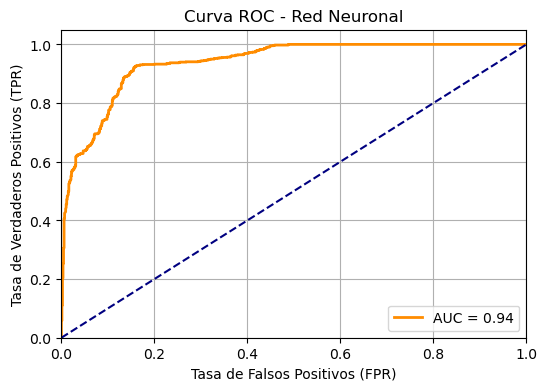


Área bajo la curva (AUC): 0.9377
¡Modelo aprobado! Se alcanzó un AUC superior al 90%.


In [85]:
# Filtrar el conjunto de datos para incluir solo las 7 características más importantes
top_features = ["status", "frequency_of_use", "seconds_of_use", 
                "complains", "subscription_length", "customer_value", "distinct_called_numbers"]

X_train_filtered = X_train[top_features]  # Conjunto de entrenamiento con solo las variables más importantes
X_test_filtered = X_test[top_features]  # Conjunto de prueba con las mismas variables seleccionadas

# Definir la arquitectura de la Red Neuronal Feedforward
modelo_nn = Sequential([
    Input(shape=(X_train_filtered.shape[1],)),  # Capa de entrada con 7 variables de entrada
    Dense(16, activation="relu"),  # Capa oculta con 16 neuronas y activación ReLU (buena para datos no lineales)
    Dense(1, activation="sigmoid")])  # Capa de salida con activación sigmoide (para clasificación binaria)


# Configurar el optimizador: Descenso del Gradiente Estocástico (SGD)
optimizador = SGD(learning_rate=0.01)  # Ajustar manualmente la tasa de aprendizaje (0.01)

# Compilar el modelo
modelo_nn.compile(optimizer=optimizador,  
                  loss="binary_crossentropy",  # Función de pérdida para clasificación binaria
                  metrics=["accuracy"])  # Medimos la precisión del modelo

# Entrenar el modelo
historial = modelo_nn.fit(X_train_filtered, y_train, 
                          epochs=50,  # Entrenar el modelo por 50 épocas (ajustado manualmente)
                          batch_size=32,  # Tamaño de lote (32 muestras por iteración)
                          validation_data=(X_test_filtered, y_test),  # Validamos con el conjunto de prueba
                          verbose=1)  # Muestra el progreso del entrenamiento en consola

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = modelo_nn.evaluate(X_test_filtered, y_test, verbose=0)
print(f"\nExactitud del modelo en test: {accuracy:.4f}")  # Mostrar la precisión del modelo en prueba

# Generar predicciones para calcular la curva ROC y AUC
y_pred_prob = modelo_nn.predict(X_test_filtered).ravel()  # Generar probabilidades de predicción
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)  # Calcular la curva ROC
roc_auc = auc(fpr, tpr)  # Calcular el área bajo la curva ROC (AUC)

# Graficar la Curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")  # Curva ROC
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")  # Línea diagonal de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Red Neuronal")
plt.legend(loc="lower right")
plt.grid(True)  # Agregar grilla para mejor visualización
plt.show()

# Mostrar el AUC alcanzado
print(f"\nÁrea bajo la curva (AUC): {roc_auc:.4f}")

# Verificar si se alcanzó el umbral de AUC > 90%
if roc_auc > 0.90:
    print("¡Modelo aprobado! Se alcanzó un AUC superior al 90%.")
else:
    print("Se requiere ajuste de hiperparámetros para mejorar el rendimiento.")


#### **<span style="color:purple">Análisis de Resultados del Modelo de Red Neuronal Feedforward</span>**

**1. Evaluación del Modelo**

El modelo de **Red Neuronal Feedforward** fue entrenado utilizando las **7 características más importantes** identificadas previamente en el análisis con **Random Forest**. Se configuró con:

- **1 capa oculta** de **16 neuronas** con activación **ReLU**.
- **1 capa de salida** con activación **sigmoide** para clasificación binaria.
- **Descenso del Gradiente Estocástico (SGD)** con una tasa de aprendizaje de **0.01**.
- **50 épocas** de entrenamiento.

Después de entrenar el modelo, se evaluó su desempeño en el conjunto de **prueba**.

**2. Resultados Obtenidos**

- **Precisión (Accuracy) en test: 0.8825**
- **Área Bajo la Curva (AUC-ROC): 0.9377**

El modelo obtuvo una precisión del **88.25%**, lo que indica que clasifica correctamente la mayoría de los clientes que renuncian y los que no. Sin embargo, la métrica más relevante en este desafío es el **AUC-ROC**.

**3. Interpretación del AUC-ROC**

El **AUC (Área Bajo la Curva ROC)** es una métrica clave en problemas de clasificación binaria. Representa la capacidad del modelo para diferenciar entre clientes que renuncian (*churn = 1*) y los que no (*churn = 0*).

- Un **AUC cercano a 1** indica un modelo altamente efectivo.
- Un **AUC de 0.5** indica un modelo que clasifica al azar.
- Un **AUC de 0.9377** significa que el modelo tiene **alta capacidad de discriminación** entre las clases.

**Como el AUC obtenido es mayor al 90%**, podemos concluir que **el modelo cumple con los requisitos del desafío** y logra una excelente capacidad predictiva.

**4. Conclusión**
**El modelo ha superado el umbral de AUC > 90%**, por lo que se considera aprobado.  
**La precisión de 88.25% es alta**, pero podría mejorarse con ajustes adicionales en los hiperparámetros.  
**Posibles mejoras** incluyen:
   - **Incrementar el número de neuronas en la capa oculta** para capturar patrones más complejos.
   - **Ajustar la tasa de aprendizaje** para mejorar la convergencia del modelo.
   - **Aumentar el número de épocas** para mejorar el aprendizaje sin sobreajustar.
